# Potential Impact of  'The Big One (M7.2)' 

## Declarations

In [23]:
import pandas as pd
import geopandas as gpd
import plotly.express as px

px.set_mapbox_access_token(open("../assets/.mapbox_token").read())

## Data Collection

Source: https://www.phivolcs.dost.gov.ph/2-uncategorised/17150-risk-analysis-project-reports

### Earthquake Impact per LGU (Total)

#### Building Damage

In [66]:
building_damage = pd.read_csv('../data/raw/building damage per LGU.csv')
casualties = pd.read_csv('../data/raw/casualties per LGU.csv')
economic_loss = pd.read_csv('../data/raw/economic loss per LGU.csv')

In [183]:
building_damage.head()

Municipality     Area (m2) Slight Damage (m2) Moderate Damage (m2)  \
0       Angono  2.207135e+07             234789               377051   
1     Antipolo  1.566855e+08            1504551              2293390   
2       Cainta  1.440818e+07             610464              1226907   
3     Caloocan  5.320184e+07            3479806              5232422   
4       Manila  4.288280e+07            4010957              8103927   

  Extensive Damage (m2) Complete Damage (m2) Complete Collapse (m2)  
0                313024               426421                  57443  
1               1919395              2814156                 358508  
2               1450371              2290627                 317201  
3               4087406              5072855                 625656  
4               9825526             11969904                1385187

In [184]:
building_damage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Municipality            24 non-null     object 
 1   Area (m2)               23 non-null     float64
 2   Slight Damage (m2)      24 non-null     object 
 3   Moderate Damage (m2)    24 non-null     object 
 4   Extensive Damage (m2)   24 non-null     object 
 5   Complete Damage (m2)    24 non-null     object 
 6   Complete Collapse (m2)  24 non-null     object 
dtypes: float64(1), object(6)
memory usage: 1.4+ KB


In [185]:
# Remove area column
building_damage = building_damage.drop('Area (m2)', axis=1)

In [186]:
#Remove SUM row
building_damage = building_damage.iloc[:-1]

In [187]:
building_damage = pd.melt(building_damage,
                          id_vars='Municipality',
                          var_name='state')

In [188]:
#remove (m2) in state
building_damage['state'] = building_damage['state'].apply(lambda x: x[:-5])

In [189]:
building_damage['impact_type'] = 'Building Damage'
building_damage['rate'] = 'total'

In [190]:
building_damage.head()

Municipality          state    value      impact_type   rate
0       Angono  Slight Damage   234789  Building Damage  total
1     Antipolo  Slight Damage  1504551  Building Damage  total
2       Cainta  Slight Damage   610464  Building Damage  total
3     Caloocan  Slight Damage  3479806  Building Damage  total
4       Manila  Slight Damage  4010957  Building Damage  total

#### Casualties

In [84]:
casualties

Municipality Slight Injuries Serious Injuries Life threatening Injuries  \
0        Angono            2303              659                        64   
1      Antipolo           25665             7427                       910   
2        Cainta           13040             4044                       536   
3      Caloocan           41243            11567                      1295   
4     Las Pinas           62895            18845                      2775   
5        Makati           19231             5582                       616   
6       Malabon           15458             4670                       609   
7   Mandaluyong           10325             3046                       403   
8        Manila           10271             3001                       392   
9      Marikina           18129             5511                       657   
10   Muntinlupa           16259             4677                       514   
11      Navotas            9344             2733                       354   
12    Paranaque           18616             5396                       496   
13        Pasay           12977             3641                       565   
14        Pasig           25649             7908                      1135   
15      Pateros            2747              834                       117   
16       Quezon           73549            20871                      2232   
17    Rodriguez            6911             1882                       229   
18     San Juan            3667             1046                       105   
19    San Mateo            9760             2878                       369   
20       Taguig           29529             8700                      1018   
21       Taytay           12648             3646                       411   
22   Valenzuela           15656             4398                       468   
23          SUM         455,872          132,962                    16,270   

   Fatalities  
0         179  
1        2030  
2        1239  
3        3114  
4        5449  
5        1491  
6        1427  
7         874  
8         817  
9        1617  
10       1206  
11        740  
12       1385  
13       1117  
14       2387  
15        239  
16       5524  
17        553  
18        306  
19        828  
20       2366  
21        997  
22       1169  
23     37,054

In [83]:
casualties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Municipality               24 non-null     object
 1   Slight Injuries            24 non-null     object
 2   Serious Injuries           24 non-null     object
 3   Life threatening Injuries  24 non-null     object
 4   Fatalities                 24 non-null     object
dtypes: object(5)
memory usage: 1.1+ KB


In [85]:
casualties = casualties.iloc[:-1]

casualties = pd.melt(casualties,
                     id_vars='Municipality',
                     var_name='state')

casualties['impact_type'] = 'Casualties'
casualties['rate'] = 'total'

In [105]:
casualties.head()

Municipality            state  value impact_type   rate
0       Angono  Slight Injuries   2303  Casualties  total
1     Antipolo  Slight Injuries  25665  Casualties  total
2       Cainta  Slight Injuries  13040  Casualties  total
3     Caloocan  Slight Injuries  41243  Casualties  total
4    Las Pinas  Slight Injuries  62895  Casualties  total

#### Economic Loss

In [94]:
economic_loss

Municipality Loss (millions of pesos)
0        Angono                     8797
1      Antipolo                    52527
2        Cainta                    45306
3      Caloocan                   119027
4     Las Pinas                   400031
5        Makati                    70436
6       Malabon                   234339
7   Mandaluyong                    41751
8        Manila                    76352
9      Marikina                    87926
10   Muntinlupa                   101281
11      Navotas                    20429
12    Paranaque                   131392
13        Pasay                   100406
14        Pasig                   190686
15      Pateros                     7263
16       Quezon                   449214
17    Rodriguez                    28559
18     San Juan                    31760
19    San Mateo                    29263
20       Taguig                   118643
21       Taytay                    39483
22   Valenzuela                    87908
23          SUM                2,472,779

In [95]:
economic_loss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Municipality              24 non-null     object
 1   Loss (millions of pesos)  24 non-null     object
dtypes: object(2)
memory usage: 512.0+ bytes


In [135]:
economic_loss = economic_loss.iloc[:-1]

economic_loss['impact_type'] = 'Economic Loss'
economic_loss['rate'] = 'total'
economic_loss['state'] = 'Financial'

economic_loss = economic_loss.rename({'Loss (millions of pesos)':'value'}, axis=1)

In [136]:
economic_loss.head()

Municipality   value    impact_type   rate      state
0       Angono    8797  Economic Loss  total  Financial
1     Antipolo   52527  Economic Loss  total  Financial
2       Cainta   45306  Economic Loss  total  Financial
3     Caloocan  119027  Economic Loss  total  Financial
4    Las Pinas  400031  Economic Loss  total  Financial

### Earthquake Impact per LGU (Normalized)

In [115]:
building_damage_norm = pd.read_csv("../data/raw/building damage per km square.csv")
casualties_norm = pd.read_csv("../data/raw/casualties per km square.csv")
economic_loss_norm = pd.read_csv("../data/raw/economic loss per km square.csv")

In [116]:
building_damage_norm.head()

Municipality  Slight Damage (per square km)  \
0       Angono                          29.13   
1     Antipolo                          39.65   
2       Cainta                          34.19   
3     Caloocan                        1965.12   
4    Las Pinas                        9353.81   

   Moderate Damage (per square km)  Extensive Damage (per square km)  \
0                            46.88                             39.65   
1                            63.48                             53.55   
2                            69.54                             84.33   
3                          3429.84                           3286.26   
4                         18575.63                          23075.20   

   Complete Damage (per square km)  Complete Collapse (per square km)  
0                            55.97                               7.57  
1                            71.96                               9.22  
2                           127.89                              17.02  
3                          3903.12                             491.24  
4                         30139.86                            3655.72

In [117]:
building_damage_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Municipality                       23 non-null     object 
 1   Slight Damage (per square km)      23 non-null     float64
 2   Moderate Damage (per square km)    23 non-null     float64
 3   Extensive Damage (per square km)   23 non-null     float64
 4   Complete Damage (per square km)    23 non-null     float64
 5   Complete Collapse (per square km)  23 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.2+ KB


In [118]:
building_damage_norm = pd.melt(building_damage_norm,
                               id_vars='Municipality',
                               var_name='state')

building_damage_norm['state'] = building_damage_norm['state'].apply(lambda x: x[:-16])

building_damage_norm['impact_type'] = 'Building Damage'
building_damage_norm['rate'] = 'normalized'

In [119]:
building_damage_norm

Municipality              state    value      impact_type        rate
0         Angono      Slight Damage    29.13  Building Damage  normalized
1       Antipolo      Slight Damage    39.65  Building Damage  normalized
2         Cainta      Slight Damage    34.19  Building Damage  normalized
3       Caloocan      Slight Damage  1965.12  Building Damage  normalized
4      Las Pinas      Slight Damage  9353.81  Building Damage  normalized
..           ...                ...      ...              ...         ...
110     San Juan  Complete Collapse    45.04  Building Damage  normalized
111    San Mateo  Complete Collapse    14.20  Building Damage  normalized
112       Taguig  Complete Collapse    46.42  Building Damage  normalized
113       Taytay  Complete Collapse     5.13  Building Damage  normalized
114   Valenzuela  Complete Collapse    29.88  Building Damage  normalized

[115 rows x 5 columns]

#### Casualties

In [122]:
casualties_norm.head()

Municipality  Slight Injuries (per square km)  \
0       Angono                          2688.56   
1     Antipolo                          8153.98   
2       Cainta                          4702.94   
3     Caloocan                        297251.14   
4    Las Pinas                       2283791.02   

   Serious Injuries (per square km)  \
0                            780.04   
1                           2382.87   
2                           1468.81   
3                          88303.99   
4                         690714.69   

   Life - threatening Injuries (per square km)  Fatalities (per square km)  
0                                        87.11                      215.10  
1                                       305.79                      662.53  
2                                       165.73                      440.63  
3                                     12644.96                    26830.97  
4                                    105456.69                   205446.39

In [123]:
casualties_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Municipality                                 23 non-null     object 
 1   Slight Injuries (per square km)              23 non-null     float64
 2   Serious Injuries (per square km)             23 non-null     float64
 3   Life - threatening Injuries (per square km)  23 non-null     float64
 4   Fatalities (per square km)                   23 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.0+ KB


In [124]:
casualties_norm = pd.melt(casualties_norm,
                          id_vars='Municipality',
                          var_name='state')

casualties_norm['state'] = casualties_norm['state'].apply(lambda x: x[:-16])

casualties_norm['impact_type'] = 'Casualties'
casualties_norm['rate'] = 'normalized'

In [126]:
casualties_norm.head()

Municipality            state       value impact_type        rate
0       Angono  Slight Injuries     2688.56  Casualties  normalized
1     Antipolo  Slight Injuries     8153.98  Casualties  normalized
2       Cainta  Slight Injuries     4702.94  Casualties  normalized
3     Caloocan  Slight Injuries   297251.14  Casualties  normalized
4    Las Pinas  Slight Injuries  2283791.02  Casualties  normalized

#### Economic Loss

In [128]:
economic_loss_norm.head()

Municipality  Loss (millions of pesos per square km )
0       Angono                                 11443.90
1     Antipolo                                 15026.87
2       Cainta                                 28458.87
3     Caloocan                               1174491.09
4    Las Pinas                               8141569.65

In [129]:
economic_loss_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Municipality                             23 non-null     object 
 1   Loss (millions of pesos per square km )  23 non-null     float64
dtypes: float64(1), object(1)
memory usage: 496.0+ bytes


In [137]:
economic_loss_norm = economic_loss_norm.rename({'Loss (millions of pesos per square km )':'value'}, axis=1)

economic_loss_norm['impact_type'] = 'Economic Loss'
economic_loss_norm['rate'] = 'normalized'
economic_loss_norm['state'] = 'Financial'

In [138]:
economic_loss_norm.head()

Municipality       value    impact_type        rate      state
0       Angono    11443.90  Economic Loss  normalized  Financial
1     Antipolo    15026.87  Economic Loss  normalized  Financial
2       Cainta    28458.87  Economic Loss  normalized  Financial
3     Caloocan  1174491.09  Economic Loss  normalized  Financial
4    Las Pinas  8141569.65  Economic Loss  normalized  Financial

In [191]:
earthquake_impact = pd.concat([building_damage, 
                               casualties, 
                               economic_loss, 
                               building_damage_norm, 
                               casualties_norm, 
                               economic_loss_norm])

In [192]:
earthquake_impact.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460 entries, 0 to 22
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Municipality  460 non-null    object
 1   state         460 non-null    object
 2   value         460 non-null    object
 3   impact_type   460 non-null    object
 4   rate          460 non-null    object
dtypes: object(5)
memory usage: 21.6+ KB


In [193]:
earthquake_impact['value'] = earthquake_impact['value'].astype(float)

In [194]:
earthquake_impact = earthquake_impact.rename({'Municipality':'municipality'}, axis=1)

In [195]:
earthquake_impact

municipality          state       value      impact_type        rate
0        Angono  Slight Damage   234789.00  Building Damage       total
1      Antipolo  Slight Damage  1504551.00  Building Damage       total
2        Cainta  Slight Damage   610464.00  Building Damage       total
3      Caloocan  Slight Damage  3479806.00  Building Damage       total
4        Manila  Slight Damage  4010957.00  Building Damage       total
..          ...            ...         ...              ...         ...
18     San Juan      Financial   132508.64    Economic Loss  normalized
19    San Mateo      Financial    19256.07    Economic Loss  normalized
20       Taguig      Financial    79327.67    Economic Loss  normalized
21       Taytay      Financial     7880.22    Economic Loss  normalized
22   Valenzuela      Financial    68131.81    Economic Loss  normalized

[460 rows x 5 columns]

### Total Earthquake Impact per LGU

In [196]:
earthquake_impact_total = earthquake_impact.groupby(['municipality', 'impact_type', 'rate']).sum().reset_index()

In [197]:
earthquake_impact_total.head()

municipality      impact_type        rate       value
0       Angono  Building Damage  normalized      179.20
1       Angono  Building Damage       total  1408728.00
2       Angono       Casualties  normalized     3770.81
3       Angono       Casualties       total     3205.00
4       Angono    Economic Loss  normalized    11443.90

### Metro Manila Boundaries

In [15]:
ph_shp = gpd.read_file("../data/raw/PHL_adm2.shp")

In [16]:
ph_shp.head()

ID_0  ISO       NAME_0  ID_1 NAME_1  ID_2     NAME_2           TYPE_2  \
0   179  PHL  Philippines     1   Abra     1    Bangued  Bayan|Munisipyo   
1   179  PHL  Philippines     1   Abra     2    Boliney  Bayan|Munisipyo   
2   179  PHL  Philippines     1   Abra     3      Bucay  Bayan|Munisipyo   
3   179  PHL  Philippines     1   Abra     4     Bucloc  Bayan|Munisipyo   
4   179  PHL  Philippines     1   Abra     5  Daguioman  Bayan|Munisipyo   

      ENGTYPE_2  NL_NAME_2 VARNAME_2  \
0  Municipality        NaN       NaN   
1  Municipality        NaN       NaN   
2  Municipality        NaN       NaN   
3  Municipality        NaN       NaN   
4  Municipality        NaN       NaN   

                                            geometry  
0  POLYGON ((120.61553 17.62360, 120.61870 17.623...  
1  POLYGON ((120.90749 17.41933, 120.92464 17.413...  
2  POLYGON ((120.74548 17.57671, 120.75101 17.575...  
3  POLYGON ((120.82477 17.41721, 120.78956 17.416...  
4  POLYGON ((120.98141 17.50534, 120.98367 17.504...

In [17]:
mm_shp = ph_shp[ph_shp["NAME_1"] == "Metropolitan Manila"]

In [18]:
mm_shp.head()

ID_0  ISO       NAME_0  ID_1               NAME_1  ID_2         NAME_2  \
960   179  PHL  Philippines    47  Metropolitan Manila   961  Kalookan City   
961   179  PHL  Philippines    47  Metropolitan Manila   962      Las Piñas   
962   179  PHL  Philippines    47  Metropolitan Manila   963    Makati City   
963   179  PHL  Philippines    47  Metropolitan Manila   964        Malabon   
964   179  PHL  Philippines    47  Metropolitan Manila   965    Mandaluyong   

              TYPE_2 ENGTYPE_2  NL_NAME_2             VARNAME_2  \
960  Lungsod|Siyudad      City        NaN                   NaN   
961  Lungsod|Siyudad      City        NaN    Las Piñas, City of   
962  Lungsod|Siyudad      City        NaN       Makati, City of   
963  Lungsod|Siyudad      City        NaN                   NaN   
964  Lungsod|Siyudad      City        NaN  Mandaluyong, City of   

                                              geometry  
960  MULTIPOLYGON (((121.01953 14.68939, 121.01971 ...  
961  MULTIPOLYGON (((120.98571 14.48585, 120.98588 ...  
962  POLYGON ((121.02175 14.57696, 121.02316 14.576...  
963  POLYGON ((120.93582 14.69482, 120.93593 14.694...  
964  POLYGON ((121.05737 14.60128, 121.05743 14.601...

<AxesSubplot:>

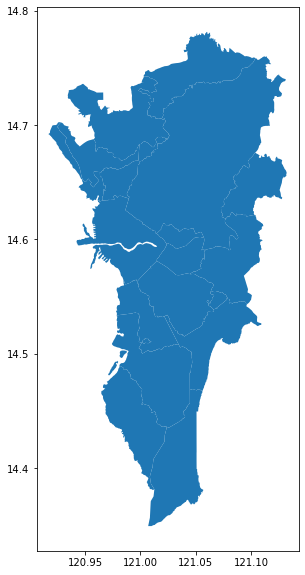

In [19]:
mm_shp.plot(figsize=(10,10))

In [20]:
mm_shp['NAME_2'].unique()

array(['Kalookan City', 'Las Piñas', 'Makati City', 'Malabon',
       'Mandaluyong', 'Manila', 'Marikina', 'Muntinlupa', 'Navotas',
       'Parañaque', 'Pasay City', 'Pasig City', 'Pateros', 'Quezon City',
       'San Juan', 'Taguig', 'Valenzuela'], dtype=object)

In [21]:
economic_loss['Municipality'].unique()

array(['Angono', 'Antipolo', 'Cainta', 'Caloocan', 'Las Pinas', 'Makati',
       'Malabon', 'Mandaluyong', 'Manila', 'Marikina', 'Muntinlupa',
       'Navotas', 'Paranaque', 'Pasay', 'Pasig', 'Pateros', 'Quezon',
       'Rodriguez', 'San Juan', 'San Mateo', 'Taguig', 'Taytay',
       'Valenzuela'], dtype=object)

In [22]:
# making city names consistent with the impact dataset

mm_cities = {'Pasay City':'Pasay', 'Kalookan City':'Caloocan', 'Makati City':'Makati', 'Pasig City':'Pasig',
            'Las Piñas': 'Las Pinas', 'Parañaque':'Paranaque', 'Quezon City':'Quezon'}

mm_shp['NAME_2'] = mm_shp['NAME_2'].apply(
    lambda x: mm_cities[x] 
    if any(city in x for city in mm_cities.keys()) 
    else x)

C:\Anaconda\lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


GeoJSON file of total earthquake impact per LGU:

In [198]:
earthquake_impact_total_gdf = mm_shp.merge(earthquake_impact_total,
                                           left_on='NAME_2',
                                           right_on='municipality',
                                           how='left')

In [202]:
earthquake_impact_total_gdf = earthquake_impact_total_gdf[list(earthquake_impact_total_gdf.columns[11:])]

In [207]:
earthquake_impact_total_gdf = earthquake_impact_total_gdf.set_index('municipality')

In [208]:
earthquake_impact_total_gdf.head()

geometry  \
municipality                                                      
Caloocan      MULTIPOLYGON (((121.01953 14.68939, 121.01971 ...   
Caloocan      MULTIPOLYGON (((121.01953 14.68939, 121.01971 ...   
Caloocan      MULTIPOLYGON (((121.01953 14.68939, 121.01971 ...   
Caloocan      MULTIPOLYGON (((121.01953 14.68939, 121.01971 ...   
Caloocan      MULTIPOLYGON (((121.01953 14.68939, 121.01971 ...   

                  impact_type        rate        value  
municipality                                            
Caloocan      Building Damage  normalized     13075.58  
Caloocan      Building Damage       total  18498145.00  
Caloocan           Casualties  normalized    425031.06  
Caloocan           Casualties       total     57219.00  
Caloocan        Economic Loss  normalized   1174491.09

### Choropleth Maps

#### Plotting Building Damage (rate=total)

In [211]:
building_damage_gdf = earthquake_impact_total_gdf[(earthquake_impact_total_gdf['impact_type'] == 'Building Damage') &
                                                  (earthquake_impact_total_gdf['rate'] == 'total')]

In [212]:
building_damage_gdf

geometry  \
municipality                                                      
Caloocan      MULTIPOLYGON (((121.01953 14.68939, 121.01971 ...   
Las Pinas     MULTIPOLYGON (((120.98571 14.48585, 120.98588 ...   
Makati        POLYGON ((121.02175 14.57696, 121.02316 14.576...   
Malabon       POLYGON ((120.93582 14.69482, 120.93593 14.694...   
Mandaluyong   POLYGON ((121.05737 14.60128, 121.05743 14.601...   
Manila        POLYGON ((120.97886 14.63668, 120.97897 14.636...   
Marikina      POLYGON ((121.10728 14.67131, 121.10785 14.671...   
Muntinlupa    POLYGON ((121.04676 14.46838, 121.04719 14.468...   
Navotas       POLYGON ((120.92940 14.69242, 120.93277 14.689...   
Paranaque     MULTIPOLYGON (((120.98647 14.50257, 120.98667 ...   
Pasay         POLYGON ((121.00084 14.50921, 121.00103 14.509...   
Pasig         POLYGON ((121.08372 14.62282, 121.08645 14.620...   
Pateros       POLYGON ((121.06555 14.55412, 121.06640 14.553...   
Quezon        POLYGON ((121.11408 14.75949, 121.11430 14.759...   
San Juan      POLYGON ((121.02362 14.61240, 121.02409 14.612...   
Taguig        POLYGON ((121.07886 14.54775, 121.07909 14.547...   
Valenzuela    POLYGON ((121.00739 14.74209, 121.00761 14.742...   

                  impact_type   rate       value  
municipality                                      
Caloocan      Building Damage  total  18498145.0  
Las Pinas     Building Damage  total  10752113.0  
Makati        Building Damage  total  17654117.0  
Malabon       Building Damage  total   6347325.0  
Mandaluyong   Building Damage  total   7679264.0  
Manila        Building Damage  total  35295501.0  
Marikina      Building Damage  total  10870279.0  
Muntinlupa    Building Damage  total  11956097.0  
Navotas       Building Damage  total   2945300.0  
Paranaque     Building Damage  total  17929952.0  
Pasay         Building Damage  total   9136910.0  
Pasig         Building Damage  total  18857172.0  
Pateros       Building Damage  total   1004033.0  
Quezon        Building Damage  total  60313374.0  
San Juan      Building Damage  total   3842028.0  
Taguig        Building Damage  total  13815491.0  
Valenzuela    Building Damage  total  14171213.0

In [215]:
fig = px.choropleth_mapbox(building_damage_gdf,
                           geojson=building_damage_gdf.geometry,
                           locations=building_damage_gdf.index,
                           color_continuous_scale="Reds",
                           color='value',
                           range_color=(0,building_damage_gdf['value'].max()),
                           center={'lat': 14.5826, 'lon': 120.9787},
                           opacity=0.5,
                           zoom=9,
                           mapbox_style="dark")

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

####  Plotting Casualties (rate=normalized)

In [216]:
casualties_gdf = earthquake_impact_total_gdf[(earthquake_impact_total_gdf['impact_type'] == 'Casualties') &
                                             (earthquake_impact_total_gdf['rate'] == 'normalized')]

In [217]:
casualties_gdf

geometry impact_type  \
municipality                                                                  
Caloocan      MULTIPOLYGON (((121.01953 14.68939, 121.01971 ...  Casualties   
Las Pinas     MULTIPOLYGON (((120.98571 14.48585, 120.98588 ...  Casualties   
Makati        POLYGON ((121.02175 14.57696, 121.02316 14.576...  Casualties   
Malabon       POLYGON ((120.93582 14.69482, 120.93593 14.694...  Casualties   
Mandaluyong   POLYGON ((121.05737 14.60128, 121.05743 14.601...  Casualties   
Manila        POLYGON ((120.97886 14.63668, 120.97897 14.636...  Casualties   
Marikina      POLYGON ((121.10728 14.67131, 121.10785 14.671...  Casualties   
Muntinlupa    POLYGON ((121.04676 14.46838, 121.04719 14.468...  Casualties   
Navotas       POLYGON ((120.92940 14.69242, 120.93277 14.689...  Casualties   
Paranaque     MULTIPOLYGON (((120.98647 14.50257, 120.98667 ...  Casualties   
Pasay         POLYGON ((121.00084 14.50921, 121.00103 14.509...  Casualties   
Pasig         POLYGON ((121.08372 14.62282, 121.08645 14.620...  Casualties   
Pateros       POLYGON ((121.06555 14.55412, 121.06640 14.553...  Casualties   
Quezon        POLYGON ((121.11408 14.75949, 121.11430 14.759...  Casualties   
San Juan      POLYGON ((121.02362 14.61240, 121.02409 14.612...  Casualties   
Taguig        POLYGON ((121.07886 14.54775, 121.07909 14.547...  Casualties   
Valenzuela    POLYGON ((121.00739 14.74209, 121.00761 14.742...  Casualties   

                    rate       value  
municipality                          
Caloocan      normalized   425031.06  
Las Pinas     normalized  3285408.79  
Makati        normalized    20905.91  
Malabon       normalized    54984.88  
Mandaluyong   normalized    24762.56  
Manila        normalized    50196.99  
Marikina      normalized    18157.07  
Muntinlupa    normalized     5744.37  
Navotas       normalized    31657.56  
Paranaque     normalized     9476.42  
Pasay         normalized   550398.67  
Pasig         normalized    53554.67  
Pateros       normalized    22129.21  
Quezon        normalized   124694.51  
San Juan      normalized    23229.39  
Taguig        normalized    46324.44  
Valenzuela    normalized    16275.07

In [218]:
fig = px.choropleth_mapbox(casualties_gdf,
                           geojson=casualties_gdf.geometry,
                           locations=casualties_gdf.index,
                           color_continuous_scale="Reds",
                           color='value',
                           range_color=(0,casualties_gdf['value'].max()),
                           center={'lat': 14.5826, 'lon': 120.9787},
                           opacity=0.5,
                           zoom=9,
                           mapbox_style="dark")

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Bar Charts

#### Economic Loss (rate=total)

In [224]:
earthquake_impact_total_gdf.index.unique()

Index(['Caloocan', 'Las Pinas', 'Makati', 'Malabon', 'Mandaluyong', 'Manila',
       'Marikina', 'Muntinlupa', 'Navotas', 'Paranaque', 'Pasay', 'Pasig',
       'Pateros', 'Quezon', 'San Juan', 'Taguig', 'Valenzuela'],
      dtype='object', name='municipality')

In [228]:
earthquake_impact_total = earthquake_impact_total[earthquake_impact_total['municipality']\
                        .isin(earthquake_impact_total_gdf.index.unique())].reset_index(drop=True)

In [229]:
earthquake_impact_total

municipality      impact_type        rate        value
0       Caloocan  Building Damage  normalized     13075.58
1       Caloocan  Building Damage       total  18498145.00
2       Caloocan       Casualties  normalized    425031.06
3       Caloocan       Casualties       total     57219.00
4       Caloocan    Economic Loss  normalized   1174491.09
..           ...              ...         ...          ...
97    Valenzuela  Building Damage       total  14171213.00
98    Valenzuela       Casualties  normalized     16275.07
99    Valenzuela       Casualties       total     21691.00
100   Valenzuela    Economic Loss  normalized     68131.81
101   Valenzuela    Economic Loss       total     87908.00

[102 rows x 4 columns]

In [231]:
impact_bar_df = earthquake_impact_total[(earthquake_impact_total['impact_type'] == "Economic Loss") &
                                        (earthquake_impact_total['rate'] == "total")]

In [235]:
sorted_df = impact_bar_df.sort_values('value')

In [236]:
sorted_df.head()

municipality    impact_type   rate    value
77      Pateros  Economic Loss  total   7263.0
53      Navotas  Economic Loss  total  20429.0
89     San Juan  Economic Loss  total  31760.0
29  Mandaluyong  Economic Loss  total  41751.0
17       Makati  Economic Loss  total  70436.0

In [248]:
impact_bar_fig = px.bar(sorted_df,
                        x="value",
                        y="municipality",
                        color="value",
                        color_continuous_scale="Reds",
                        range_color=(0, sorted_df.value.max()),
                        labels={
                            "municipality": "Municipality",
                            "value":"Value"}, 
                        title="Economic Loss per LGU",
                        height=600)

impact_bar_fig.update_layout(coloraxis_showscale=False, plot_bgcolor='white')

#### Building Damage States of Makati (rate=total)

In [242]:
earthquake_impact = earthquake_impact[earthquake_impact['municipality']\
                                      .isin(earthquake_impact_total_gdf.index.unique())].reset_index(drop=True)

In [244]:
earthquake_impact.head()

municipality          state      value      impact_type   rate
0     Caloocan  Slight Damage  3479806.0  Building Damage  total
1       Manila  Slight Damage  4010957.0  Building Damage  total
2    Las Pinas  Slight Damage  1898996.0  Building Damage  total
3       Makati  Slight Damage  2239323.0  Building Damage  total
4      Malabon  Slight Damage  1012122.0  Building Damage  total

In [245]:
municipality_df = earthquake_impact[(earthquake_impact['municipality'] == 'Makati') &
                                        (earthquake_impact['impact_type'] == 'Building Damage') &
                                        (earthquake_impact['rate'] == 'total')]

In [246]:
municipality_df.head()

municipality              state      value      impact_type   rate
3        Makati      Slight Damage  2239323.0  Building Damage  total
20       Makati    Moderate Damage  4291520.0  Building Damage  total
37       Makati   Extensive Damage  4261247.0  Building Damage  total
54       Makati    Complete Damage  6223243.0  Building Damage  total
71       Makati  Complete Collapse   638784.0  Building Damage  total

In [247]:
municipality_fig = px.bar(municipality_df,
                          x="value",
                          y="state",
                          color="value",
                          color_continuous_scale="blugrn",
                          range_color=(0,municipality_df['value'].max()),
                          labels={
                            "state": "Damage States",
                            "value":"Value"},
                          title="Building Damage States of Makati",
                          height=400)

municipality_fig.update_layout(coloraxis_showscale=False,
                               plot_bgcolor='white')

## Export Data

In [253]:
#earthquake_impact.to_csv("../data/analytics/earthquake_impact.csv")

In [254]:
#earthquake_impact_total.to_csv("data/analytics/earthquake_impact_total.csv")

In [252]:
# earthquake_impact_total_gdf.reset_index().to_file("data/analytics/earthquake_impact_total_gdf.geojson", driver="GeoJSON")